<a href="https://colab.research.google.com/github/AmirMohammadNajafi1383/University_Works/blob/main/Customer%20behavior%20analysis_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# نصب کتابخانه‌ها (اکثراً در Colab موجودند ولی برای اطمینان)
!pip install pandas matplotlib scikit-learn tensorflow

# آپلود فایل CSV
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [ ]:
# وارد کردن کتابخانه‌ها
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# خواندن داده‌ها
try:
    data = pd.read_csv('data.csv', encoding='latin1')
except FileNotFoundError:
    print("فایل data.csv یافت نشد!")
    exit()

# پیش‌پردازش
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Hour'] = data['InvoiceDate'].dt.hour
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data = data.drop(['InvoiceNo', 'InvoiceDate'], axis=1).dropna()

# کدگذاری
le_country = LabelEncoder()
data['Country'] = le_country.fit_transform(data['Country'])

# آماده‌سازی داده‌ها
X_numeric = data.drop(['Quantity', 'Description', 'StockCode'], axis=1)
X_stock = data['StockCode'].values
Y = data['Quantity']

# نرمال‌سازی
scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(Y.values.reshape(-1, 1))

# خوشه‌بندی
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_numeric_scaled)
data['Cluster'] = clusters

# افزودن به ویژگی‌ها
X_numeric['Cluster'] = clusters
scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)

# تقسیم داده
x_train_num, x_test_num, x_train_stock, x_test_stock, y_train, y_test = train_test_split(
    X_numeric_scaled, X_stock, y_scaled, test_size=0.2, random_state=42
)

# ساخت مدل
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_num.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# کامپایل
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# آموزش
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train_num, y_train, epochs=20, batch_size=64,
                    validation_split=0.2, callbacks=[early_stopping], verbose=1)

# ارزیابی
y_pred_scaled = model.predict(x_test_num)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test)
mse = mean_squared_error(y_test_orig, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4069/4069 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 2.4096 - mae: 0.6343 - val_loss: 0.0643 - val_mae: 0.1950
Epoch 2/20
4069/4069 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 2.3604 - mae: 0.2300 - val_loss: 0.0357 - val_mae: 0.1147
Epoch 3/20
4069/4069 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 1.2879 - mae: 0.1334 - val_loss: 0.0281 - val_mae: 0.0681
Epoch 4/20
4069/4069 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.9110 - mae: 0.0909 - val_loss: 0.0272 - val_mae: 0.0556
Epoch 5/20
4069/4069 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 1.1636 - mae: 0.0699 - val_loss: 0.0248 - val_mae: 0.0482
Epoch 6/20
4069/4069 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 1.8115 - mae: 0.0626 - val_loss: 0.0208 - val_mae: 0.0441
Epoch 7/20
4069/4069 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 1.6846 - mae: 0.0594 - val_loss: 0.0241 - val_mae: 0.0413
Epoch 8/20
4069/4069 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 1.2107 - mae: 0.0535 - val_loss: 0.0271 - val_mae: 0.0410
Epoch 9/20
4069/4069 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
# ذخیره مدل
model.save('customer_quantity_model.keras')

# دانلود مدل
from google.colab import files
files.download('customer_quantity_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###new version

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4069/4069 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 2.3478 - mae: 0.6092 - val_loss: 0.0318 - val_mae: 0.0799
Epoch 2/20
4069/4069 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 1.5125 - mae: 0.1950 - val_loss: 0.0260 - val_mae: 0.0511
Epoch 3/20
4069/4069 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 1.7402 - mae: 0.1131 - val_loss: 0.0244 - val_mae: 0.0437
Epoch 4/20
4069/4069 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.6761 - mae: 0.0784 - val_loss: 0.0258 - val_mae: 0.0420
Epoch 5/20
4069/4069 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 1.0167 - mae: 0.0672 - val_loss: 0.0256 - val_mae: 0.0435
Epoch 6/20
4069/4069 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 1.2446 - mae: 0.0628 - val_loss: 0.0363 - val_mae: 0.0453
Epoch 7/20
4069/4069 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 1.2568 - mae: 0.0579 - val_loss: 0.0374 - val_mae: 0.0454
Epoch 8/20
4069/4069 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 1.1387 - mae: 0.0556 - val_loss: 0.0372 - val_mae: 0.0446


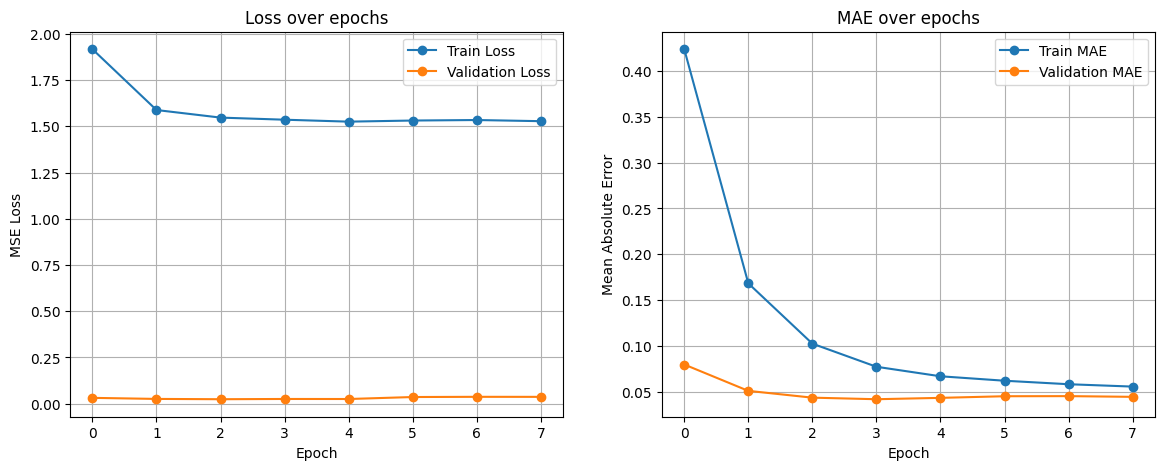

2543/2543 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step

✅ Mean Squared Error (MSE): 1523.57
✅ Mean Absolute Error (MAE): 10.63


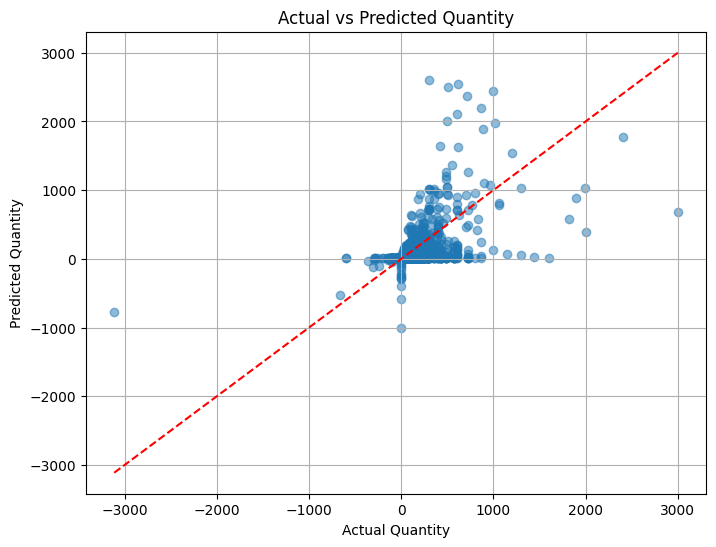

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 📦 نصب کتابخانه‌ها (اگر لازم بود)
!pip install pandas matplotlib scikit-learn tensorflow

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# آدرس کامل فایل در گوگل درایو
file_path = '/content/drive/My Drive/BachelorProject/data.csv'
df = pd.read_csv(file_path, encoding='latin1')

print(df.head())

# 🏗 ایمپورت کتابخانه‌ها
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# 🔄 خواندن داده
data = pd.read_csv('data.csv', encoding='latin1')

# ⏳ پردازش تاریخ و ویژگی‌ها
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Hour'] = data['InvoiceDate'].dt.hour
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data = data.drop(['InvoiceNo', 'InvoiceDate'], axis=1).dropna()

# 🎯 کدگذاری کشور
le_country = LabelEncoder()
data['Country'] = le_country.fit_transform(data['Country'])

# 🔥 آماده‌سازی داده‌ها
X_numeric = data.drop(['Quantity', 'Description', 'StockCode'], axis=1)
X_stock = data['StockCode'].values
Y = data['Quantity']

# ⚖ نرمال‌سازی
scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(Y.values.reshape(-1, 1))

# 🔵 خوشه‌بندی
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_numeric_scaled)
X_numeric['Cluster'] = clusters

# دوباره scale چون Cluster اضافه شد
scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)

# 🚀 تقسیم داده
x_train_num, x_test_num, x_train_stock, x_test_stock, y_train, y_test = train_test_split(
    X_numeric_scaled, X_stock, y_scaled, test_size=0.2, random_state=42
)

# 🧠 ساخت مدل
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_num.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# ⚙ کامپایل
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 🚀 آموزش
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train_num, y_train, epochs=20, batch_size=64,
                    validation_split=0.2, callbacks=[early_stopping], verbose=1)

# 📊 ترسیم نمودارهای یادگیری
plt.figure(figsize=(14,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

# MAE
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE', marker='o')
plt.plot(history.history['val_mae'], label='Validation MAE', marker='o')
plt.title('MAE over epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.show()

# 📈 ارزیابی
y_pred_scaled = model.predict(x_test_num)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test)
mse = mean_squared_error(y_test_orig, y_pred)
mae = mean_absolute_error(y_test_orig, y_pred)

print(f"\n✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")

# 📉 نمودار واقعی vs پیش‌بینی‌شده
plt.figure(figsize=(8,6))
plt.scatter(y_test_orig, y_pred, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity')
plt.grid(True)
plt.show()

# 💾 ذخیره مدل
model.save('customer_quantity_model.keras')
from google.colab import files
files.download('customer_quantity_model.keras')


##تشخیص تعداد کلاستر با خودش باشه

In [ ]:
# 📦 نصب کتابخانه‌ها (اگر لازم بود)
!pip install pandas matplotlib scikit-learn tensorflow kneed

# 🔄 Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# 📚 imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from kneed import KneeLocator

# 🔄 خواندن داده از درایو
file_path = '/content/drive/My Drive/BachelorProject/data.csv'
data = pd.read_csv(file_path, encoding='latin1')

# ⏳ پردازش تاریخ و ویژگی‌ها
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Hour'] = data['InvoiceDate'].dt.hour
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data = data.drop(['InvoiceNo', 'InvoiceDate'], axis=1).dropna()

# 🎯 کدگذاری کشور
le_country = LabelEncoder()
data['Country'] = le_country.fit_transform(data['Country'])

# 🔥 آماده‌سازی داده‌ها
X_numeric = data.drop(['Quantity', 'Description', 'StockCode'], axis=1)
X_stock = data['StockCode'].values
Y = data['Quantity']

# ⚖ نرمال‌سازی
scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(Y.values.reshape(-1, 1))

# 🔍 پیدا کردن تعداد خوشه بهینه با Elbow
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_numeric_scaled)
    inertias.append(kmeans.inertia_)

# 📈 نمودار Elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# 📌 استفاده از KneeLocator برای پیدا کردن نقطه زانو
kl = KneeLocator(K_range, inertias, curve="convex", direction="decreasing")
n_clusters = kl.elbow
print(f"\n✅ Optimal number of clusters found: {n_clusters}")

# 🔵 خوشه‌بندی با n_clusters بهینه
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_numeric_scaled)
X_numeric['Cluster'] = clusters

# دوباره scale چون Cluster اضافه شد
scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)

# 🚀 تقسیم داده
x_train_num, x_test_num, x_train_stock, x_test_stock, y_train, y_test = train_test_split(
    X_numeric_scaled, X_stock, y_scaled, test_size=0.2, random_state=42
)

# 🧠 ساخت مدل
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_num.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# ⚙ کامپایل
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 🚀 آموزش
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train_num, y_train, epochs=20, batch_size=64,
                    validation_split=0.2, callbacks=[early_stopping], verbose=1)

# 📊 نمودارهای آموزش
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE', marker='o')
plt.plot(history.history['val_mae'], label='Validation MAE', marker='o')
plt.title('MAE over epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

# 📈 ارزیابی
y_pred_scaled = model.predict(x_test_num)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test)
mse = mean_squared_error(y_test_orig, y_pred)
mae = mean_absolute_error(y_test_orig, y_pred)
print(f"\n✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")

# 📉 نمودار واقعی vs پیش‌بینی‌شده
plt.figure(figsize=(8,6))
plt.scatter(y_test_orig, y_pred, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()],
         [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity')
plt.grid(True)
plt.show()


KeyboardInterrupt: 

## کد بهینه تر

2.19.0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[3245 2645 2851 ... 2083 2084 1037]


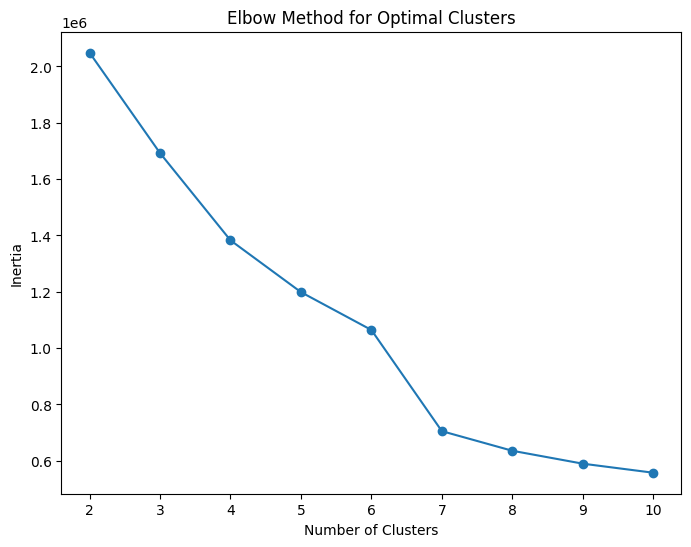

Reloading Tuner from tuner_dir/untitled_project/tuner0.json
x_train_num shape: (318718, 7)
x_train_stock shape: (318718,)
y_train shape: (318718, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ stock_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 24)     │     88,320 │ stock_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 24)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 31)        │          0 │ numeric_input[0]… │
│ (Concatenate)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 96)        │      3,072 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 96)        │        384 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 96)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      6,208 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 98,305 (384.00 KB)

 Trainable params: 97,985 (382.75 KB)

 Non-trainable params: 320 (1.25 KB)

None
x_train_num shape: (318718, 7)
x_train_stock shape: (318718,)
y_train shape: (318718, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Epoch 1/20
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.3063 - mae: 0.0269 - val_loss: 2.8475 - val_mae: 0.0243
Epoch 2/20
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.8033 - mae: 0.0317 - val_loss: 2.7648 - val_mae: 0.0264
Epoch 3/20
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0546 - mae: 0.0295 - val_loss: 1.0485 - val_mae: 0.0322
Epoch 4/20
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.1479 - mae: 0.0327 - val_loss: 4.2594 - val_mae: 0.0289
Epoch 5/20
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.3896 - mae: 0.0331 - val_loss: 4.2905 - val_mae: 0.0329
Epoch 6/20
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.2501 - mae: 0.0349 - val_loss: 17.2461 - val_mae: 0.0418
Epoch 7/20
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.5061 - mae: 0.0352 - val_loss: 13.3862 - val_mae: 0.0417
Epoch 8/20
3984/39

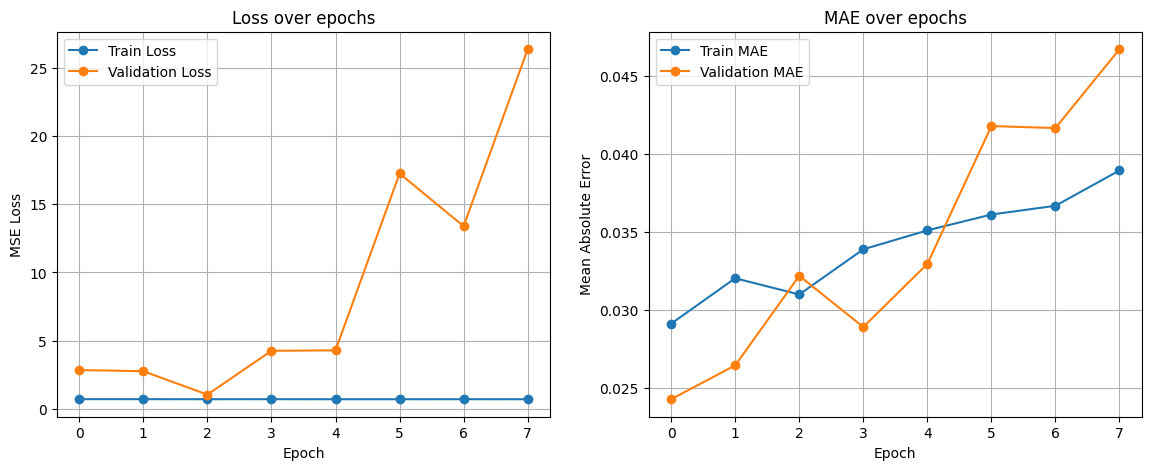

2490/2490 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

✅ Mean Squared Error (MSE): 407.08
✅ Mean Absolute Error (MAE): 4.57
✅ R² Score: -1.31


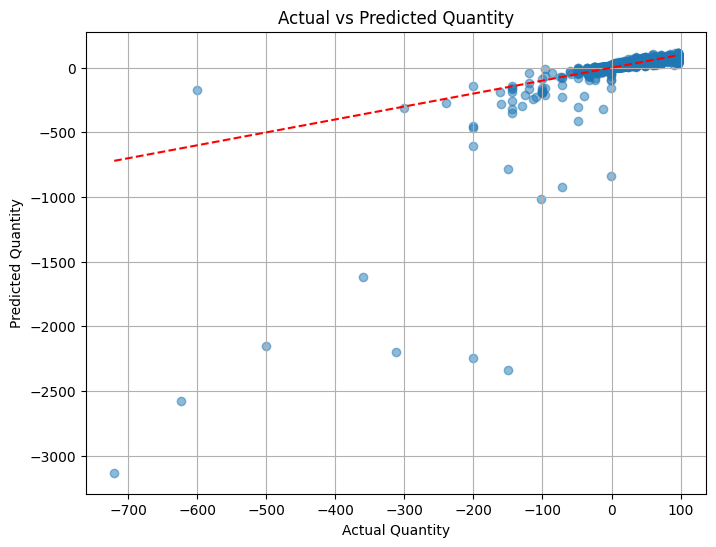

In [ ]:
!pip install pandas matplotlib scikit-learn tensorflow keras-tuner
!pip install --upgrade tensorflow
import tensorflow as tf
print(tf.__version__)  # باید 2.10 یا بالاتر باشد


# 🔄 Mount Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Model  # فقط Model کافی است
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Embedding, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import kerastuner as kt

# 🔄 خواندن داده از درایو
file_path = '/content/drive/My Drive/BachelorProject/data.csv'
data = pd.read_csv(file_path, encoding='latin1')

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Hour'] = data['InvoiceDate'].dt.hour
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

data = data[(data['Quantity'] < data['Quantity'].quantile(0.99)) &
            (data['TotalPrice'] < data['TotalPrice'].quantile(0.99))]
data = data.drop(['InvoiceNo', 'InvoiceDate'], axis=1).dropna()

le_country = LabelEncoder()
data['Country'] = le_country.fit_transform(data['Country'])
from sklearn.preprocessing import LabelEncoder
X_stock = data['StockCode']
# تبدیل StockCode به مقادیر عددی متوالی
le = LabelEncoder()
X_stock_encoded = le.fit_transform(X_stock)
print(X_stock_encoded)

X_numeric = data.drop(['Quantity', 'Description', 'StockCode'], axis=1)
X_stock = data['StockCode'].values  # برای استفاده بعدی با Embedding
Y = data['Quantity']

scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(Y.values.reshape(-1, 1))

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_numeric_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

n_clusters = 5  # می‌توانید بر اساس نمودار تغییر دهید
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_numeric_scaled)
X_numeric['Cluster'] = clusters
scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)


x_train_num, x_test_num, x_train_stock, x_test_stock, y_train, y_test = train_test_split(
    X_numeric_scaled, X_stock_encoded, y_scaled, test_size=0.2, random_state=42
)

def build_model(hp):
    # تعریف ورودی‌ها
    input_numeric = Input(shape=(x_train_num.shape[1],), name='numeric_input')
    input_stock = Input(shape=(1,), name='stock_input')

    # لایه Embedding برای StockCode
    stock_code_max = np.max(X_stock_encoded) + 1  # چون مقادیر از 0 تا max هستند
    embedding = Embedding(input_dim=stock_code_max, output_dim=hp.Int('embedding_dim', 8, 32, step=8))(input_stock)
    flatten = Flatten()(embedding)

    # ترکیب ورودی‌ها
    combined = Concatenate()([input_numeric, flatten])

    # ساخت مدل
    x = Dense(hp.Int('units1', min_value=32, max_value=128, step=32), activation='relu')(combined)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout1', 0.2, 0.4, step=0.1))(x)
    x = Dense(hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout2', 0.1, 0.3, step=0.1))(x)
    output = Dense(1, activation='linear')(x)

    # ایجاد مدل نهایی
    model = Model(inputs=[input_numeric, input_stock], outputs=output)
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-4, 1e-3])),
                  loss='mse', metrics=['mae'])
    return model

tuner = kt.RandomSearch(build_model, objective='val_loss', max_trials=10, directory='tuner_dir')
tuner.search([x_train_num, x_train_stock], y_train, epochs=20, validation_split=0.2,
             callbacks=[EarlyStopping(monitor='val_loss', patience=5)])
best_model = tuner.get_best_models(num_models=1)[0]


x_train_num = x_train_num.astype('float32')
y_train = y_train.astype('float32')
x_test_num = x_test_num.astype('float32')
y_test = y_test.astype('float32')
# Verify shapes
print("x_train_num shape:", x_train_num.shape)
print("x_train_stock shape:", x_train_stock.shape)
print("y_train shape:", y_train.shape)


print(best_model.summary())
print("x_train_num shape:", x_train_num.shape)
print("x_train_stock shape:", x_train_stock.shape)
print("y_train shape:", y_train.shape)


# پیش‌بینی و آموزش
_ = best_model.predict([x_test_num[:1], x_test_stock[:1]])
history = best_model.fit(
    [x_train_num, x_train_stock], y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
    verbose=1
)

# ترسیم نمودارهای یادگیری
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE', marker='o')
plt.plot(history.history['val_mae'], label='Validation MAE', marker='o')
plt.title('MAE over epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

# ارزیابی
y_pred_scaled = best_model.predict([x_test_num, x_test_stock])
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test)
mse = mean_squared_error(y_test_orig, y_pred)
mae = mean_absolute_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"\n✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ R² Score: {r2:.2f}")

# ترسیم نمودار واقعی در مقابل پیش‌بینی‌شده
plt.figure(figsize=(8, 6))
plt.scatter(y_test_orig, y_pred, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity')
plt.grid(True)
plt.show()

##مجدد جوری که تعداد کلاسترها رو خودش تشخیص میده

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


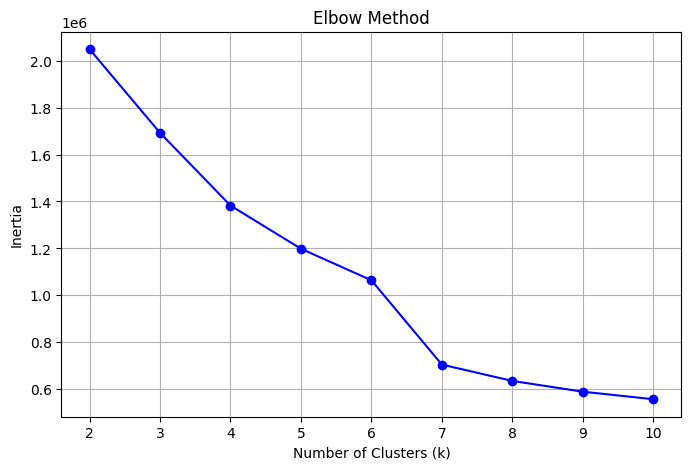

✅ Optimal number of clusters: 7
Reloading Tuner from tuner_dir/untitled_project/tuner0.json
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3984/3984 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 1.0955 - mae: 0.0541 - val_loss: 57.1567 - val_mae: 0.0461
Epoch 2/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0871 - mae: 0.0338 - val_loss: 44.3156 - val_mae: 0.0486
Epoch 3/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 0.7024 - mae: 0.0619 - val_loss: 367.3913 - val_mae: 0.1011
Epoch 4/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.0667 - mae: 0.0469 - val_loss: 38.2458 - val_mae: 0.0542
Epoch 5/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 0.0435 - mae: 0.0628 - val_loss: 4.0035 - val_mae: 0.0683
Epoch 6/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 0.5525 - mae: 0.0664 - val_loss: 884.8004 - val_mae: 0.1462
Epoch 7/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 1.9995 - mae: 0.0830 - val_loss: 286.0576 - val_mae: 0.0864
Epoch 8/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 0.3100 - mae: 0.0463 - val_loss: 658.7784 - val_mae: 0.1226


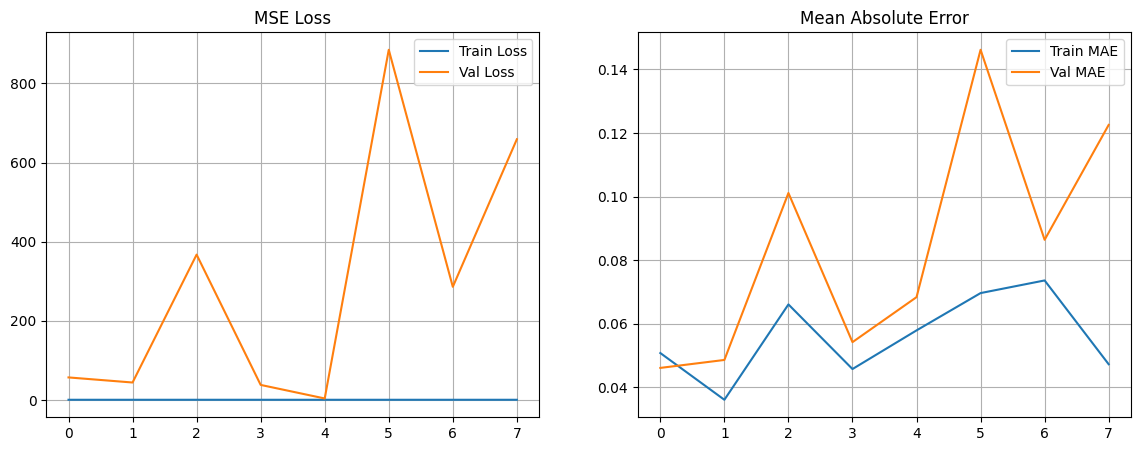

2490/2490 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step

✅ Mean Squared Error: 2395.63
✅ Mean Absolute Error: 3.31
✅ R² Score: -12.57


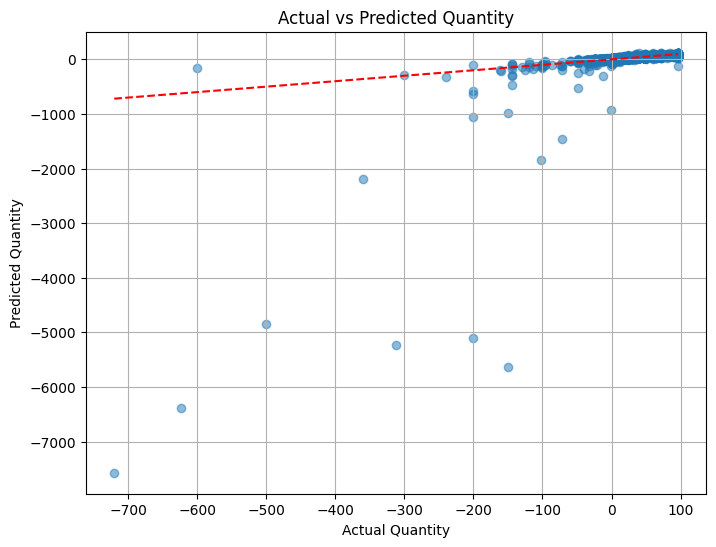

NameError: name 'model' is not defined

In [ ]:
# 📦 نصب کتابخانه‌ها
!pip install pandas matplotlib scikit-learn tensorflow keras-tuner kneed

# 🗂️ Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from kneed import KneeLocator
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Embedding, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import kerastuner as kt

# 📄 Load Data
file_path = '/content/drive/My Drive/BachelorProject/data.csv'
data = pd.read_csv(file_path, encoding='latin1')

# 🧱 Feature Engineering
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Hour'] = data['InvoiceDate'].dt.hour
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# حذف outlier
data = data[(data['Quantity'] < data['Quantity'].quantile(0.99)) & (data['TotalPrice'] < data['TotalPrice'].quantile(0.99))]
data = data.drop(['InvoiceNo', 'InvoiceDate'], axis=1).dropna()

# Label Encoding
le_country = LabelEncoder()
data['Country'] = le_country.fit_transform(data['Country'])
le_stock = LabelEncoder()
X_stock_encoded = le_stock.fit_transform(data['StockCode'])

# Features and Labels
X_numeric = data.drop(['Quantity', 'Description', 'StockCode'], axis=1)
Y = data['Quantity']

# 📏 Scaling
scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(Y.values.reshape(-1, 1)).flatten()

# 🔍 تعیین تعداد خوشه‌ها با Elbow + KneeLocator
inertias = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_numeric_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

kl = KneeLocator(K_range, inertias, curve="convex", direction="decreasing")
n_clusters = kl.elbow if kl.elbow is not None else 5
print(f"✅ Optimal number of clusters: {n_clusters}")

# 🧩 Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_numeric_scaled)
X_numeric['Cluster'] = clusters

# مجدد Scale چون ویژگی جدید اضافه شده
scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)

# 🎯 Split
x_train_num, x_test_num, x_train_stock, x_test_stock, y_train, y_test = train_test_split(
    X_numeric_scaled, X_stock_encoded, y_scaled, test_size=0.2, random_state=42
)

# 🧠 Define Model
def build_model(hp):
    input_numeric = Input(shape=(x_train_num.shape[1],), name='numeric_input')
    input_stock = Input(shape=(1,), name='stock_input')

    embedding = Embedding(input_dim=np.max(X_stock_encoded)+1,
                          output_dim=hp.Int('embedding_dim', 8, 32, step=8))(input_stock)
    flatten = Flatten()(embedding)
    combined = Concatenate()([input_numeric, flatten])

    x = Dense(hp.Int('units1', 32, 128, step=32), activation='relu')(combined)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout1', 0.2, 0.4, step=0.1))(x)
    x = Dense(hp.Int('units2', 16, 64, step=16), activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout2', 0.1, 0.3, step=0.1))(x)

    output = Dense(1, activation='linear')(x)
    model = Model(inputs=[input_numeric, input_stock], outputs=output)
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-4, 1e-3])),
                  loss='mse', metrics=['mae'])
    return model

# 🔍 Hyperparameter Tuning
tuner = kt.RandomSearch(build_model, objective='val_loss', max_trials=5, directory='tuner_dir')
tuner.search([x_train_num, x_train_stock], y_train, epochs=20, validation_split=0.2,
             callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

best_model = tuner.get_best_models(num_models=1)[0]

# 🚀 Final Training
history = best_model.fit(
    [x_train_num, x_train_stock], y_train,
    epochs=50, batch_size=64,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)],
    verbose=1
)

# 📊 Plot Learning Curves
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.grid(True); plt.title('MSE Loss')

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend(); plt.grid(True); plt.title('Mean Absolute Error')
plt.show()

# 📈 Evaluation
y_pred_scaled = best_model.predict([x_test_num, x_test_stock])
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1,1))

mse = mean_squared_error(y_test_orig, y_pred)
mae = mean_absolute_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"\n✅ Mean Squared Error: {mse:.2f}")
print(f"✅ Mean Absolute Error: {mae:.2f}")
print(f"✅ R² Score: {r2:.2f}")

# 📉 Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test_orig, y_pred, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity')
plt.grid(True)
plt.show()


from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png',
           show_shapes=True, show_layer_names=True)



#یه مدل دات سامری هم اضافه کنیم

Trial 5 Complete [00h 02m 14s]
val_loss: 0.4870140552520752

Best val_loss So Far: 0.03454485535621643
Total elapsed time: 00h 18m 34s

✅ Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ stock_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 24)     │     88,320 │ stock_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 24)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 31)        │          0 │ numeric_input[0]… │
│ (Concatenate)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 96)        │      3,072 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 96)        │        384 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 96)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      6,208 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 98,305 (384.00 KB)

 Trainable params: 97,985 (382.75 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.9158 - mae: 0.0309 - val_loss: 0.1381 - val_mae: 0.0170
Epoch 2/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.1582 - mae: 0.0281 - val_loss: 2.7682 - val_mae: 0.0267
Epoch 3/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.2277 - mae: 0.0340 - val_loss: 1.8421 - val_mae: 0.0409
Epoch 4/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.7846 - mae: 0.0375 - val_loss: 5.6697 - val_mae: 0.0357


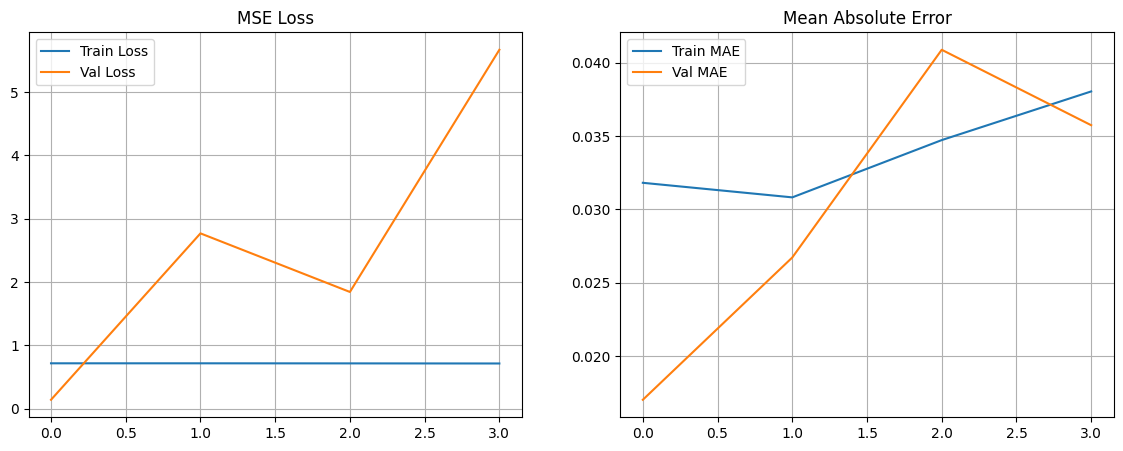

2490/2490 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

✅ Mean Squared Error: 157.36
✅ Mean Absolute Error: 4.58
✅ R² Score: 0.11


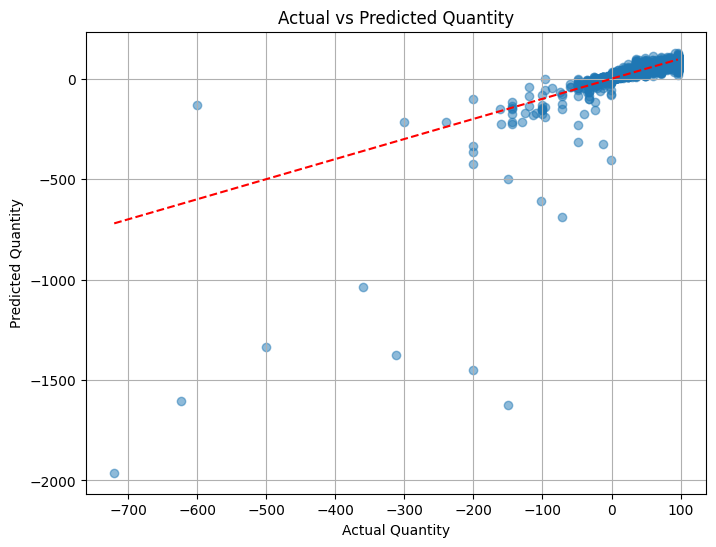

In [ ]:
# 📦 نصب کتابخانه‌ها
!pip install pandas matplotlib scikit-learn tensorflow keras-tuner kneed

# 🗂️ Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from kneed import KneeLocator
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Embedding, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import kerastuner as kt

# ⚠️ پاک کردن نتایج Tuner قبلی
!rm -rf tuner_dir

# 📄 Load Data
file_path = '/content/drive/My Drive/BachelorProject/data.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Feature Engineering
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Hour'] = data['InvoiceDate'].dt.hour
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

data = data[(data['Quantity'] < data['Quantity'].quantile(0.99)) & (data['TotalPrice'] < data['TotalPrice'].quantile(0.99))]
data = data.drop(['InvoiceNo', 'InvoiceDate'], axis=1).dropna()

# Label Encoding
le_country = LabelEncoder()
data['Country'] = le_country.fit_transform(data['Country'])
le_stock = LabelEncoder()
X_stock_encoded = le_stock.fit_transform(data['StockCode'])

# Features and Labels
X_numeric = data.drop(['Quantity', 'Description', 'StockCode'], axis=1)
Y = data['Quantity']

# 📏 Scaling
scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(Y.values.reshape(-1, 1)).flatten()

# 🔍 تعیین تعداد خوشه‌ها
inertias = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_numeric_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

kl = KneeLocator(K_range, inertias, curve="convex", direction="decreasing")
n_clusters = kl.elbow if kl.elbow is not None else 5
print(f"✅ Optimal number of clusters: {n_clusters}")

# 🧩 Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_numeric_scaled)
X_numeric['Cluster'] = clusters

scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)

# 🎯 Split
x_train_num, x_test_num, x_train_stock, x_test_stock, y_train, y_test = train_test_split(
    X_numeric_scaled, X_stock_encoded, y_scaled, test_size=0.2, random_state=42
)

# 🧠 Model
def build_model(hp):
    input_numeric = Input(shape=(x_train_num.shape[1],), name='numeric_input')
    input_stock = Input(shape=(1,), name='stock_input')

    embedding = Embedding(input_dim=np.max(X_stock_encoded)+1,
                          output_dim=hp.Int('embedding_dim', 8, 32, step=8))(input_stock)
    flatten = Flatten()(embedding)
    combined = Concatenate()([input_numeric, flatten])

    x = Dense(hp.Int('units1', 32, 128, step=32), activation='relu')(combined)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout1', 0.2, 0.4, step=0.1))(x)
    x = Dense(hp.Int('units2', 16, 64, step=16), activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout2', 0.1, 0.3, step=0.1))(x)

    output = Dense(1, activation='linear')(x)
    model = Model(inputs=[input_numeric, input_stock], outputs=output)
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-4, 1e-3])),
                  loss='mse', metrics=['mae'])
    return model

# 🔍 Hyperparameter Tuning
tuner = kt.RandomSearch(build_model, objective='val_loss', max_trials=5, directory='tuner_dir')
tuner.search([x_train_num, x_train_stock], y_train, epochs=20, validation_split=0.2,
             callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

best_model = tuner.get_best_models(num_models=1)[0]

# 🚀 Print Summary
print("\n✅ Model Summary:")
best_model.summary()


# 🚀 Final Training
history = best_model.fit(
    [x_train_num, x_train_stock], y_train,
    epochs=50, batch_size=64,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)],
    verbose=1
)

# 📊 Plot Learning Curves
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.grid(True); plt.title('MSE Loss')

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend(); plt.grid(True); plt.title('Mean Absolute Error')
plt.show()

# 📈 Evaluation
y_pred_scaled = best_model.predict([x_test_num, x_test_stock])
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1,1))

mse = mean_squared_error(y_test_orig, y_pred)
mae = mean_absolute_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"\n✅ Mean Squared Error: {mse:.2f}")
print(f"✅ Mean Absolute Error: {mae:.2f}")
print(f"✅ R² Score: {r2:.2f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test_orig, y_pred, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Actual vs Predicted Quantity')
plt.grid(True)
plt.show()

#برای نمایش گرافیکی مدل

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


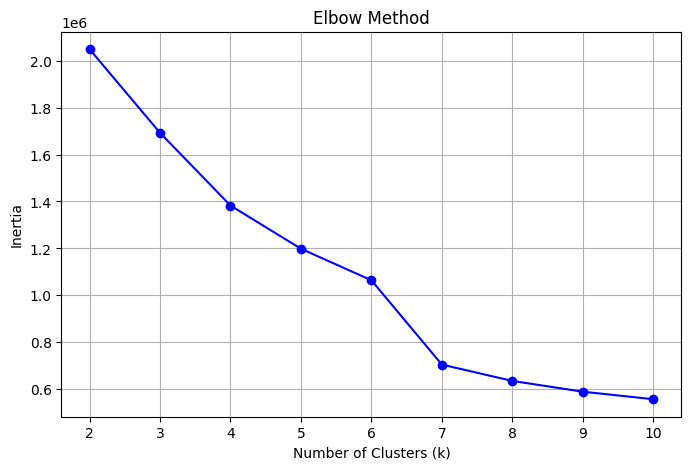

✅ Optimal number of clusters: 7
Reloading Tuner from tuner_dir/untitled_project/tuner0.json

✅ Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ stock_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 24)     │     88,320 │ stock_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 24)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 31)        │          0 │ numeric_input[0]… │
│ (Concatenate)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      4,096 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128)       │        512 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 101,505 (396.50 KB)

 Trainable params: 101,121 (395.00 KB)

 Non-trainable params: 384 (1.50 KB)

Google Drive already mounted.
✅ Saved to: /content/drive/MyDrive/Model_Diagrams/nn_architecture_vertical.png


In [ ]:
# 📦 نصب کتابخانه‌ها
!pip install pandas matplotlib scikit-learn tensorflow keras-tuner kneed

# 🗂️ Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from kneed import KneeLocator
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Embedding, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import kerastuner as kt

# ⚠️ پاک کردن نتایج Tuner قبلی
#!rm -rf tuner_dir

# 📄 Load Data
file_path = '/content/drive/My Drive/BachelorProject/data.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Feature Engineering
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Hour'] = data['InvoiceDate'].dt.hour
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

data = data[(data['Quantity'] < data['Quantity'].quantile(0.99)) & (data['TotalPrice'] < data['TotalPrice'].quantile(0.99))]
data = data.drop(['InvoiceNo', 'InvoiceDate'], axis=1).dropna()

# Label Encoding
le_country = LabelEncoder()
data['Country'] = le_country.fit_transform(data['Country'])
le_stock = LabelEncoder()
X_stock_encoded = le_stock.fit_transform(data['StockCode'])

# Features and Labels
X_numeric = data.drop(['Quantity', 'Description', 'StockCode'], axis=1)
Y = data['Quantity']

# 📏 Scaling
scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(Y.values.reshape(-1, 1)).flatten()

# 🔍 تعیین تعداد خوشه‌ها
inertias = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_numeric_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

kl = KneeLocator(K_range, inertias, curve="convex", direction="decreasing")
n_clusters = kl.elbow if kl.elbow is not None else 5
print(f"✅ Optimal number of clusters: {n_clusters}")

# 🧩 Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_numeric_scaled)
X_numeric['Cluster'] = clusters

scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)

# 🎯 Split
x_train_num, x_test_num, x_train_stock, x_test_stock, y_train, y_test = train_test_split(
    X_numeric_scaled, X_stock_encoded, y_scaled, test_size=0.2, random_state=42
)

# 🧠 Model
def build_model(hp):
    input_numeric = Input(shape=(x_train_num.shape[1],), name='numeric_input')
    input_stock = Input(shape=(1,), name='stock_input')

    embedding = Embedding(input_dim=np.max(X_stock_encoded)+1,
                          output_dim=hp.Int('embedding_dim', 8, 32, step=8))(input_stock)
    flatten = Flatten()(embedding)
    combined = Concatenate()([input_numeric, flatten])

    x = Dense(hp.Int('units1', 32, 128, step=32), activation='relu')(combined)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout1', 0.2, 0.4, step=0.1))(x)
    x = Dense(hp.Int('units2', 16, 64, step=16), activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout2', 0.1, 0.3, step=0.1))(x)

    output = Dense(1, activation='linear')(x)
    model = Model(inputs=[input_numeric, input_stock], outputs=output)
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-4, 1e-3])),
                  loss='mse', metrics=['mae'])
    return model

# 🔍 Hyperparameter Tuning
tuner = kt.RandomSearch(build_model, objective='val_loss', max_trials=5, directory='tuner_dir')
tuner.search([x_train_num, x_train_stock], y_train, epochs=20, validation_split=0.2,
             callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

best_model = tuner.get_best_models(num_models=1)[0]

# 🚀 Print Summary
print("\n✅ Model Summary:")
best_model.summary()

#222222222222222222222222222222222222222222222222222222222222222222222222222

!apt-get install -qq graphviz
from graphviz import Digraph
from google.colab import drive
import os

# 📂 Mount Google Drive (فقط اگر قبلاً مونت نشده)
mount_point = '/content/drive'
if not os.path.exists(mount_point) or len(os.listdir(mount_point)) == 0:
    drive.mount(mount_point)
else:
    print("Google Drive already mounted.")

save_dir = '/content/drive/MyDrive/Model_Diagrams'
os.makedirs(save_dir, exist_ok=True)
output_path = os.path.join(save_dir, 'nn_architecture_vertical')

# ------ تعریف معماری ------
numeric_features = 12
dense_units = [8, 6, 4]  # Hidden layers
output_units = 1

# ------ ساخت دیاگرام ------
dot = Digraph(format='png')
dot.attr(rankdir='TB', splines='line', nodesep='0.8', ranksep='1')  # عمودی

input_color = "#AED6F1"
hidden_color = "#A9DFBF"
output_color = "#F5B7B1"

# لایه ورودی
with dot.subgraph() as s:
    s.attr(rank='same')
    s.node("InputLabel", "Input Layer", shape='plaintext', fontsize='12')  # برچسب
    for i in range(numeric_features):
        s.node(f"I{i}", "", shape='circle', style='filled', fillcolor=input_color, width="0.5", height="0.5")

# لایه‌های مخفی
for l, units in enumerate(dense_units):
    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node(f"HiddenLabel{l}", f"Hidden Layer {l+1}", shape='plaintext', fontsize='12')
        for j in range(units):
            s.node(f"H{l}_{j}", "", shape='circle', style='filled', fillcolor=hidden_color, width="0.5", height="0.5")

# لایه خروجی
with dot.subgraph() as s:
    s.attr(rank='same')
    s.node("OutputLabel", "Output Layer", shape='plaintext', fontsize='12')
    for k in range(output_units):
        s.node(f"O{k}", "", shape='circle', style='filled', fillcolor=output_color, width="0.5", height="0.5")

# اتصالات
for i in range(numeric_features):
    for j in range(dense_units[0]):
        dot.edge(f"I{i}", f"H0_{j}")

for l in range(len(dense_units)-1):
    for j in range(dense_units[l]):
        for k in range(dense_units[l+1]):
            dot.edge(f"H{l}_{j}", f"H{l+1}_{k}")

for j in range(dense_units[-1]):
    for k in range(output_units):
        dot.edge(f"H{len(dense_units)-1}_{j}", f"O{k}")

# ذخیره
dot.render(output_path, cleanup=True)
print("✅ Saved to:", output_path + ".png")



#"تست موردی واقعی" (real sample prediction)

In [ ]:
# ======================
# 🚀 Real Sample Prediction
# ======================
sample_index = 458

# گرفتن یک نمونه
sample_numeric = X_numeric.iloc[sample_index].values.reshape(1, -1).astype(float)
sample_stock = np.array([[X_stock_encoded[sample_index]]], dtype=np.int32)  # باید int32 و شکل (1,1)

# مقیاس‌گذاری
sample_numeric_scaled = scaler_X.transform(sample_numeric)

# پیش‌بینی
pred_scaled = best_model.predict([sample_numeric_scaled, sample_stock], verbose=0)
pred_quantity = scaler_y.inverse_transform(pred_scaled)

print("\n✅ Actual Quantity:", Y.iloc[sample_index])
print("✅ Predicted Quantity:", pred_quantity.flatten()[0])

# به بهینه ترین کد از لحاظ خطا رسیدیم

#حالا میخوام چیزای جدید امتحان کنم

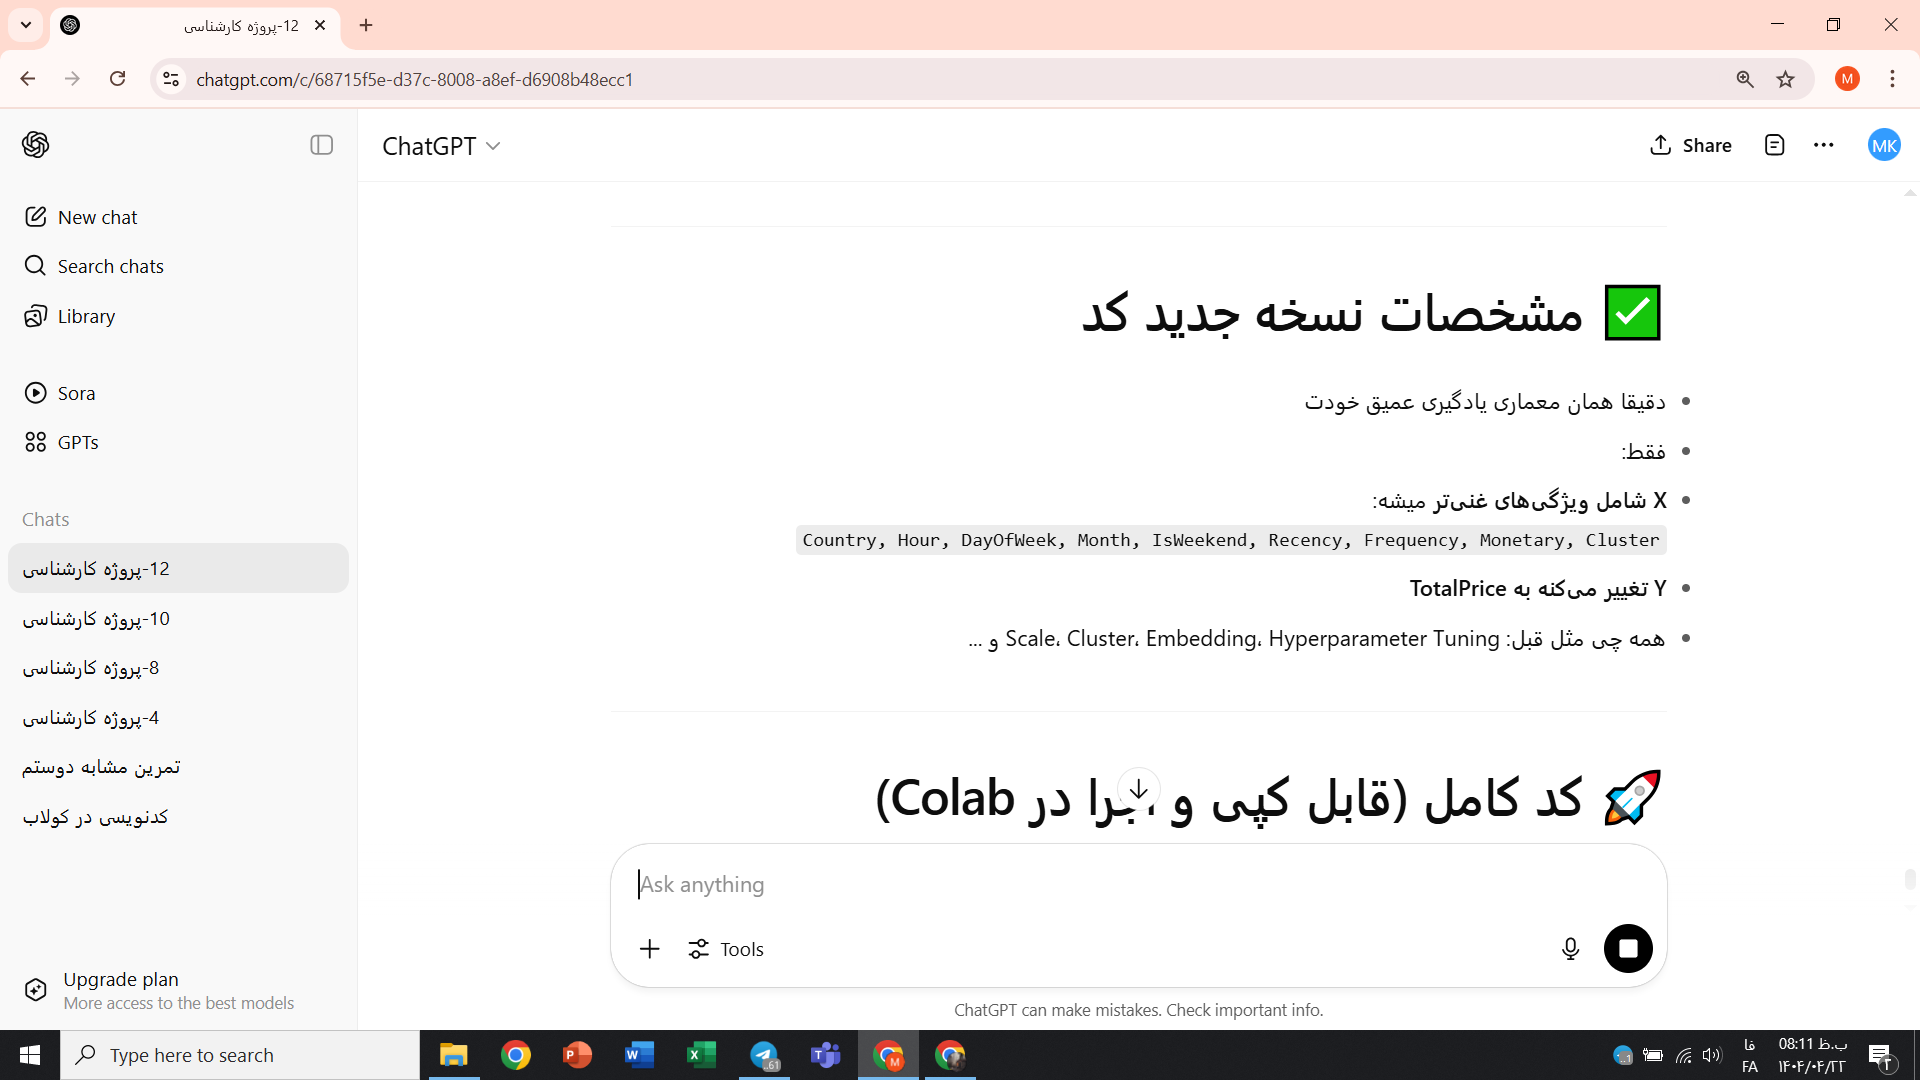

Trial 5 Complete [00h 06m 49s]
val_loss: 0.5899288058280945

Best val_loss So Far: 0.05673221871256828
Total elapsed time: 00h 45m 44s
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3984/3984 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 0.0824 - mae: 0.0427 - val_loss: 0.1435 - val_mae: 0.0347
Epoch 2/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.3923 - mae: 0.0555 - val_loss: 0.1896 - val_mae: 0.0320
Epoch 3/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.2768 - mae: 0.0589 - val_loss: 0.9405 - val_mae: 0.0671
Epoch 4/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 1.3961 - mae: 0.0634 - val_loss: 0.1721 - val_mae: 0.0326


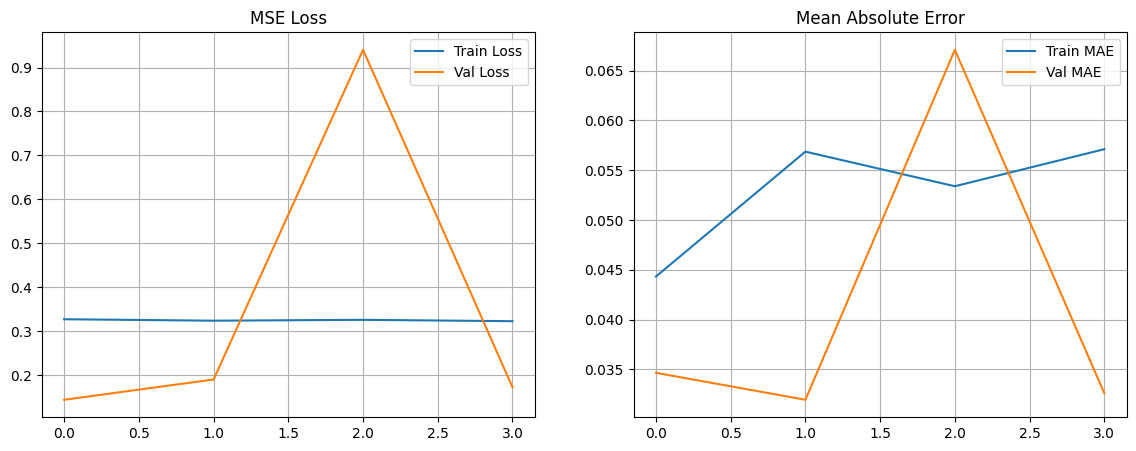

2490/2490 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step

✅ MSE: 1456.97
✅ MAE: 9.44
✅ R²: 0.07


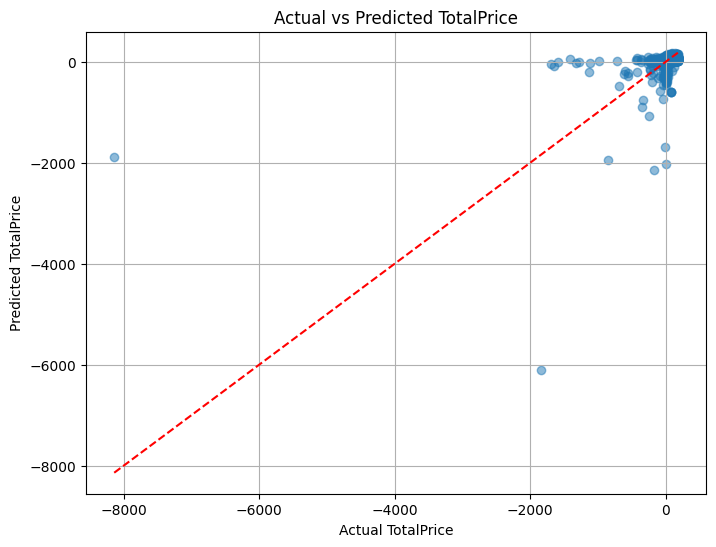

In [ ]:
# 📦 نصب کتابخانه‌ها
!pip install pandas matplotlib scikit-learn tensorflow keras-tuner kneed

# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from kneed import KneeLocator
from datetime import timedelta
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Embedding, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import kerastuner as kt
from google.colab import drive

# 🗂️ Mount Drive
drive.mount('/content/drive')

# 📄 Load Data
file_path = '/content/drive/My Drive/BachelorProject/data.csv'
data = pd.read_csv(file_path, encoding='latin1')

# 🧱 Feature Engineering
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Hour'] = data['InvoiceDate'].dt.hour
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['Month'] = data['InvoiceDate'].dt.month
data['IsWeekend'] = data['DayOfWeek'].apply(lambda x: 1 if x>=5 else 0)
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# حذف outlier
data = data[(data['Quantity'] < data['Quantity'].quantile(0.99)) & (data['TotalPrice'] < data['TotalPrice'].quantile(0.99))]
data = data.drop(['InvoiceNo', 'Description'], axis=1).dropna()

# 📊 محاسبه RFM
latest_date = data['InvoiceDate'].max() + timedelta(days=1)
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'StockCode': 'count',
    'TotalPrice': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Merge RFM به داده اصلی
data = data.merge(rfm, on='CustomerID', how='left')

# Encode کشور و StockCode
le_country = LabelEncoder()
data['Country'] = le_country.fit_transform(data['Country'])
le_stock = LabelEncoder()
X_stock_encoded = le_stock.fit_transform(data['StockCode'])

# Features and Labels
X_numeric = data[['Country', 'Hour', 'DayOfWeek', 'Month', 'IsWeekend', 'Recency', 'Frequency', 'Monetary']]
Y = data['TotalPrice']

# Scale
scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(Y.values.reshape(-1,1)).flatten()

# Clustering
inertias = []
K_range = range(2,11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_numeric_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

kl = KneeLocator(K_range, inertias, curve="convex", direction="decreasing")
n_clusters = kl.elbow if kl.elbow else 5
print(f"✅ Optimal number of clusters: {n_clusters}")

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_numeric_scaled)
X_numeric['Cluster'] = clusters

# مجدد Scale
scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)

# 🎯 Split
x_train_num, x_test_num, x_train_stock, x_test_stock, y_train, y_test = train_test_split(
    X_numeric_scaled, X_stock_encoded, y_scaled, test_size=0.2, random_state=42
)

# 🧠 Model
def build_model(hp):
    input_numeric = Input(shape=(x_train_num.shape[1],), name='numeric_input')
    input_stock = Input(shape=(1,), name='stock_input')

    embedding = Embedding(input_dim=np.max(X_stock_encoded)+1,
                          output_dim=hp.Int('embedding_dim', 8, 32, step=8))(input_stock)
    flatten = Flatten()(embedding)
    combined = Concatenate()([input_numeric, flatten])

    x = Dense(hp.Int('units1', 32, 128, step=32), activation='relu')(combined)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout1', 0.2, 0.4, step=0.1))(x)
    x = Dense(hp.Int('units2', 16, 64, step=16), activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout2', 0.1, 0.3, step=0.1))(x)

    output = Dense(1, activation='linear')(x)
    model = Model(inputs=[input_numeric, input_stock], outputs=output)
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-4, 1e-3])),
                  loss='mse', metrics=['mae'])
    return model

tuner = kt.RandomSearch(build_model, objective='val_loss', max_trials=5, directory='tuner_dir')
tuner.search([x_train_num, x_train_stock], y_train, epochs=20, validation_split=0.2,
             callbacks=[EarlyStopping(monitor='val_loss', patience=3)])
best_model = tuner.get_best_models(1)[0]

# 🚀 Train
history = best_model.fit([x_train_num, x_train_stock], y_train,
                         epochs=50, batch_size=64,
                         validation_split=0.2,
                         callbacks=[EarlyStopping(monitor='val_loss', patience=3)],
                         verbose=1)

# 📈 Plots
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.grid(True); plt.title('MSE Loss')

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend(); plt.grid(True); plt.title('Mean Absolute Error')
plt.show()

# 🔍 Evaluation
y_pred_scaled = best_model.predict([x_test_num, x_test_stock])
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1,1))

mse = mean_squared_error(y_test_orig, y_pred)
mae = mean_absolute_error(y_test_orig, y_pred)
r2 = r2_score(y_test_orig, y_pred)

print(f"\n✅ MSE: {mse:.2f}")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ R²: {r2:.2f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test_orig, y_pred, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.xlabel('Actual TotalPrice')
plt.ylabel('Predicted TotalPrice')
plt.title('Actual vs Predicted TotalPrice')
plt.grid(True)
plt.show()


------------------------------

---------------------------------------------------

-------------------------------------

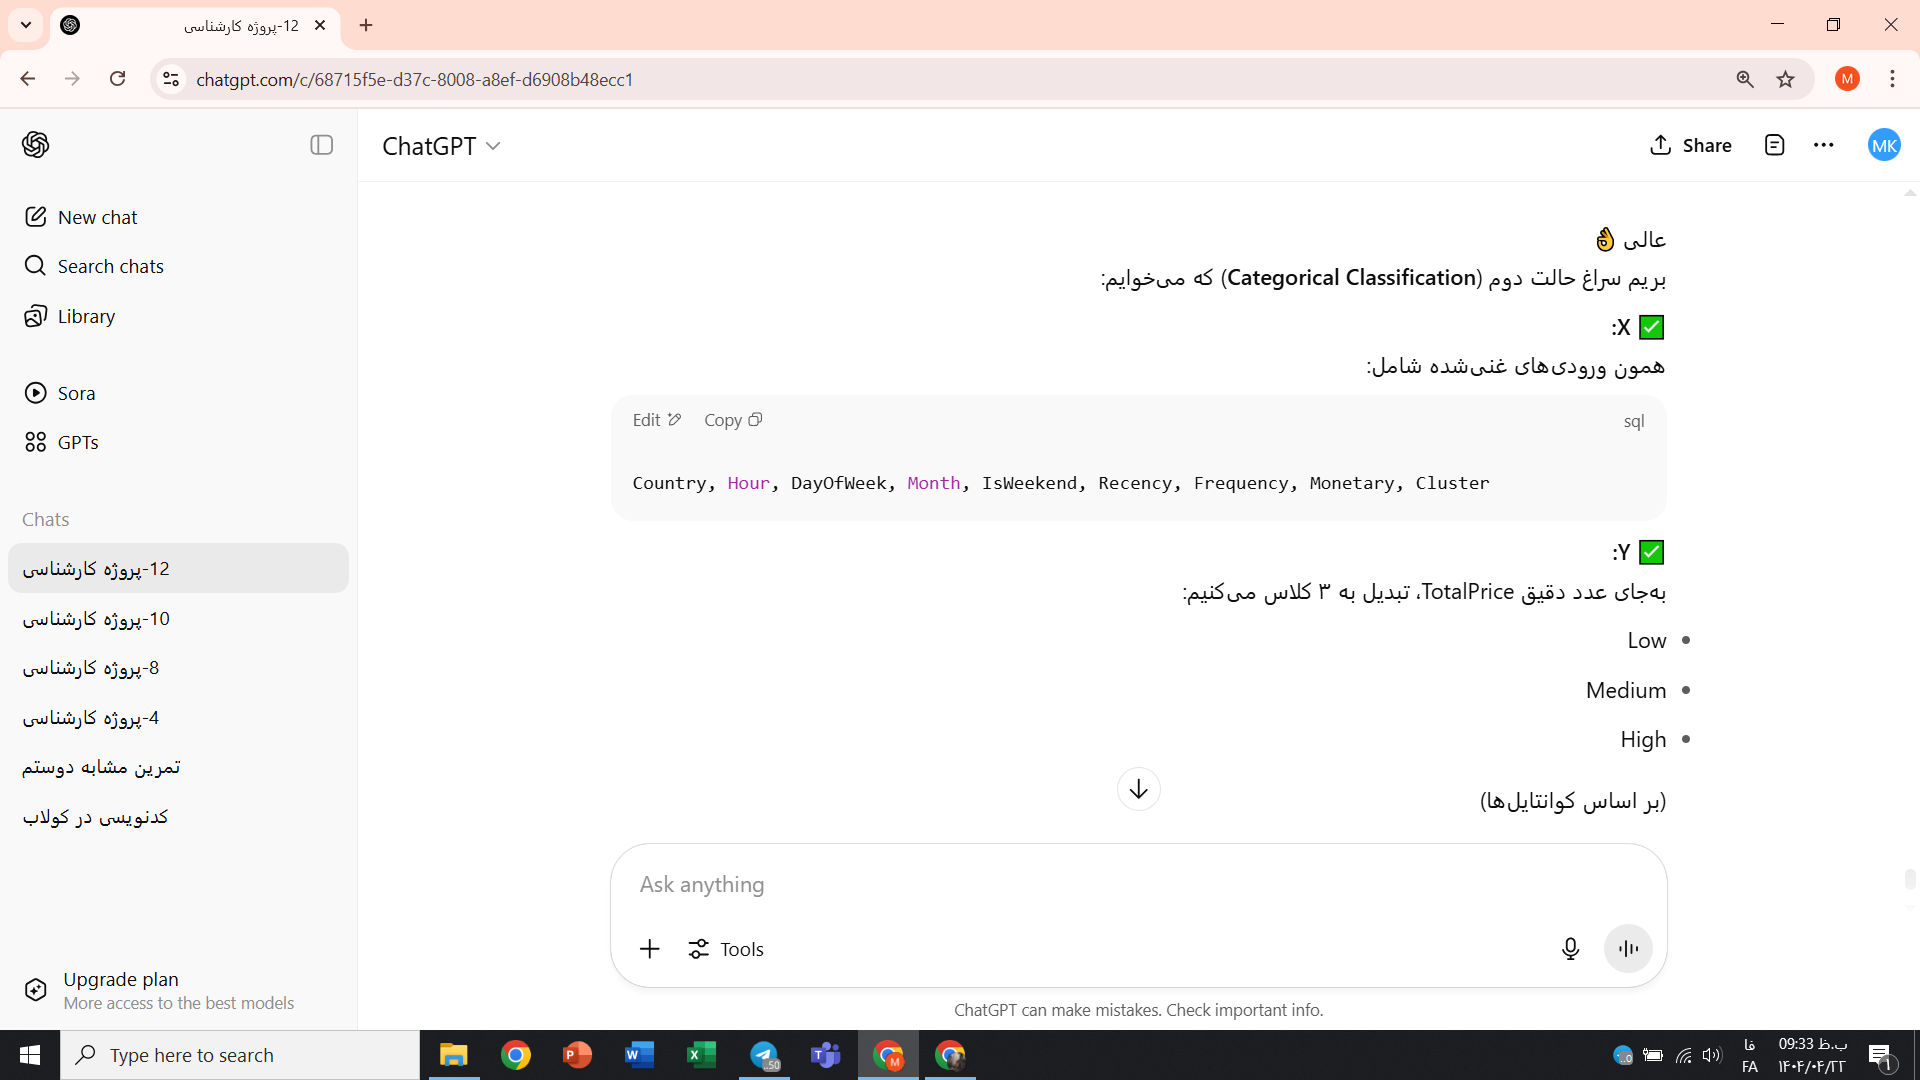

Trial 5 Complete [00h 13m 16s]
val_loss: 0.6285762786865234

Best val_loss So Far: 0.595684826374054
Total elapsed time: 01h 04m 17s
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3984/3984 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.7607 - loss: 0.5942 - val_accuracy: 0.7601 - val_loss: 0.5966
Epoch 2/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 45s 6ms/step - accuracy: 0.7599 - loss: 0.5945 - val_accuracy: 0.7624 - val_loss: 0.5918
Epoch 3/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.7607 - loss: 0.5923 - val_accuracy: 0.7627 - val_loss: 0.5911
Epoch 4/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7637 - loss: 0.5862 - val_accuracy: 0.7626 - val_loss: 0.5900
Epoch 5/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.7635 - loss: 0.5859 - val_accuracy: 0.7576 - val_loss: 0.6015
Epoch 6/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.7642 - loss: 0.5861 - val_accuracy: 0.7623 - val_loss: 0.5896
Epoch 7/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.7633 - loss: 0.5846 - val_accuracy: 0.7633 - val_loss: 0.5884
Epoch 8/50
3984/3984 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.7627 - loss: 0.5865 - val

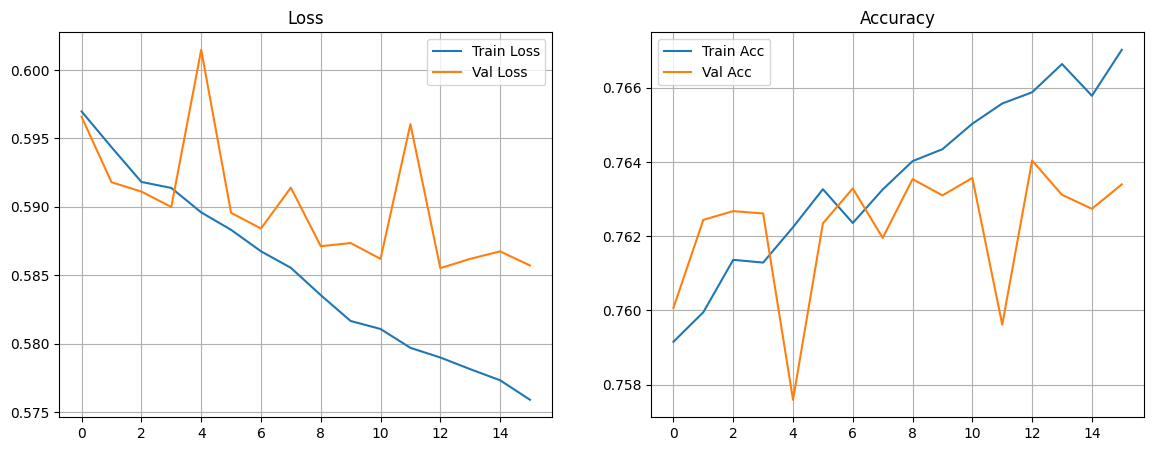

2490/2490 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
✅ Classification Report:
              precision    recall  f1-score   support

         Low       0.78      0.81      0.79     26666
      Medium       0.71      0.71      0.71     26597
        High       0.82      0.78      0.80     26417

    accuracy                           0.77     79680
   macro avg       0.77      0.77      0.77     79680
weighted avg       0.77      0.77      0.77     79680



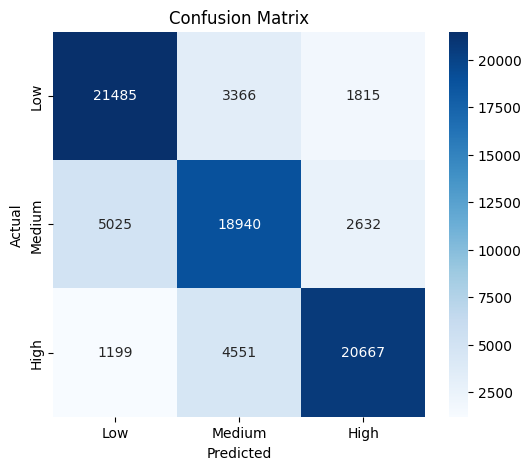

In [ ]:
# 📦 نصب کتابخانه‌ها
!pip install pandas matplotlib scikit-learn tensorflow keras-tuner kneed

# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from kneed import KneeLocator
from datetime import timedelta
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Embedding, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import kerastuner as kt
from google.colab import drive

# 🗂️ Mount Drive
drive.mount('/content/drive')

# 📄 Load Data
file_path = '/content/drive/My Drive/BachelorProject/data.csv'
data = pd.read_csv(file_path, encoding='latin1')

# 🧱 Feature Engineering
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Hour'] = data['InvoiceDate'].dt.hour
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['Month'] = data['InvoiceDate'].dt.month
data['IsWeekend'] = data['DayOfWeek'].apply(lambda x: 1 if x>=5 else 0)
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# حذف outlier
data = data[(data['Quantity'] < data['Quantity'].quantile(0.99)) &
            (data['TotalPrice'] < data['TotalPrice'].quantile(0.99))]
data = data.drop(['InvoiceNo', 'Description'], axis=1).dropna()

# 📊 محاسبه RFM
latest_date = data['InvoiceDate'].max() + timedelta(days=1)
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'StockCode': 'count',
    'TotalPrice': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
data = data.merge(rfm, on='CustomerID', how='left')

# 📌 Label Encode
le_country = LabelEncoder()
data['Country'] = le_country.fit_transform(data['Country'])
le_stock = LabelEncoder()
X_stock_encoded = le_stock.fit_transform(data['StockCode'])

# 🏷️ ایجاد کلاس‌ها بر اساس TotalPrice
quantiles = data['TotalPrice'].quantile([0.33, 0.66]).values
def categorize_price(value):
    if value <= quantiles[0]:
        return 0  # Low
    elif value <= quantiles[1]:
        return 1  # Medium
    else:
        return 2  # High
data['PriceClass'] = data['TotalPrice'].apply(categorize_price)

# 🎯 Features and Labels
X_numeric = data[['Country', 'Hour', 'DayOfWeek', 'Month', 'IsWeekend', 'Recency', 'Frequency', 'Monetary']]
Y = data['PriceClass']

# 📏 Scale
scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)

# Clustering
inertias = []
K_range = range(2,11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_numeric_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

kl = KneeLocator(K_range, inertias, curve="convex", direction="decreasing")
n_clusters = kl.elbow if kl.elbow else 5
print(f"✅ Optimal number of clusters: {n_clusters}")

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_numeric_scaled)
X_numeric['Cluster'] = clusters

# مجدد Scale
scaler_X = StandardScaler()
X_numeric_scaled = scaler_X.fit_transform(X_numeric)

# 🎲 Split
x_train_num, x_test_num, x_train_stock, x_test_stock, y_train, y_test = train_test_split(
    X_numeric_scaled, X_stock_encoded, Y, test_size=0.2, random_state=42, stratify=Y
)

# 🧠 Model
def build_model(hp):
    input_numeric = Input(shape=(x_train_num.shape[1],), name='numeric_input')
    input_stock = Input(shape=(1,), name='stock_input')

    embedding = Embedding(input_dim=np.max(X_stock_encoded)+1,
                          output_dim=hp.Int('embedding_dim', 8, 32, step=8))(input_stock)
    flatten = Flatten()(embedding)
    combined = Concatenate()([input_numeric, flatten])

    x = Dense(hp.Int('units1', 32, 128, step=32), activation='relu')(combined)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout1', 0.2, 0.4, step=0.1))(x)
    x = Dense(hp.Int('units2', 16, 64, step=16), activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(hp.Float('dropout2', 0.1, 0.3, step=0.1))(x)

    output = Dense(3, activation='softmax')(x)  # 3 classes
    model = Model(inputs=[input_numeric, input_stock], outputs=output)
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-4, 1e-3])),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(build_model, objective='val_loss', max_trials=5, directory='tuner_dir_class')
tuner.search([x_train_num, x_train_stock], y_train, epochs=20, validation_split=0.2,
             callbacks=[EarlyStopping(monitor='val_loss', patience=3)])
best_model = tuner.get_best_models(1)[0]

# 🚀 Train
history = best_model.fit([x_train_num, x_train_stock], y_train,
                         epochs=50, batch_size=64,
                         validation_split=0.2,
                         callbacks=[EarlyStopping(monitor='val_loss', patience=3)],
                         verbose=1)

# 📈 Plots
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.grid(True); plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.grid(True); plt.title('Accuracy')
plt.show()

# 🔍 Evaluate
y_pred_probs = best_model.predict([x_test_num, x_test_stock])
y_pred_classes = np.argmax(y_pred_probs, axis=1)

print("✅ Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['Low', 'Medium', 'High']))

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


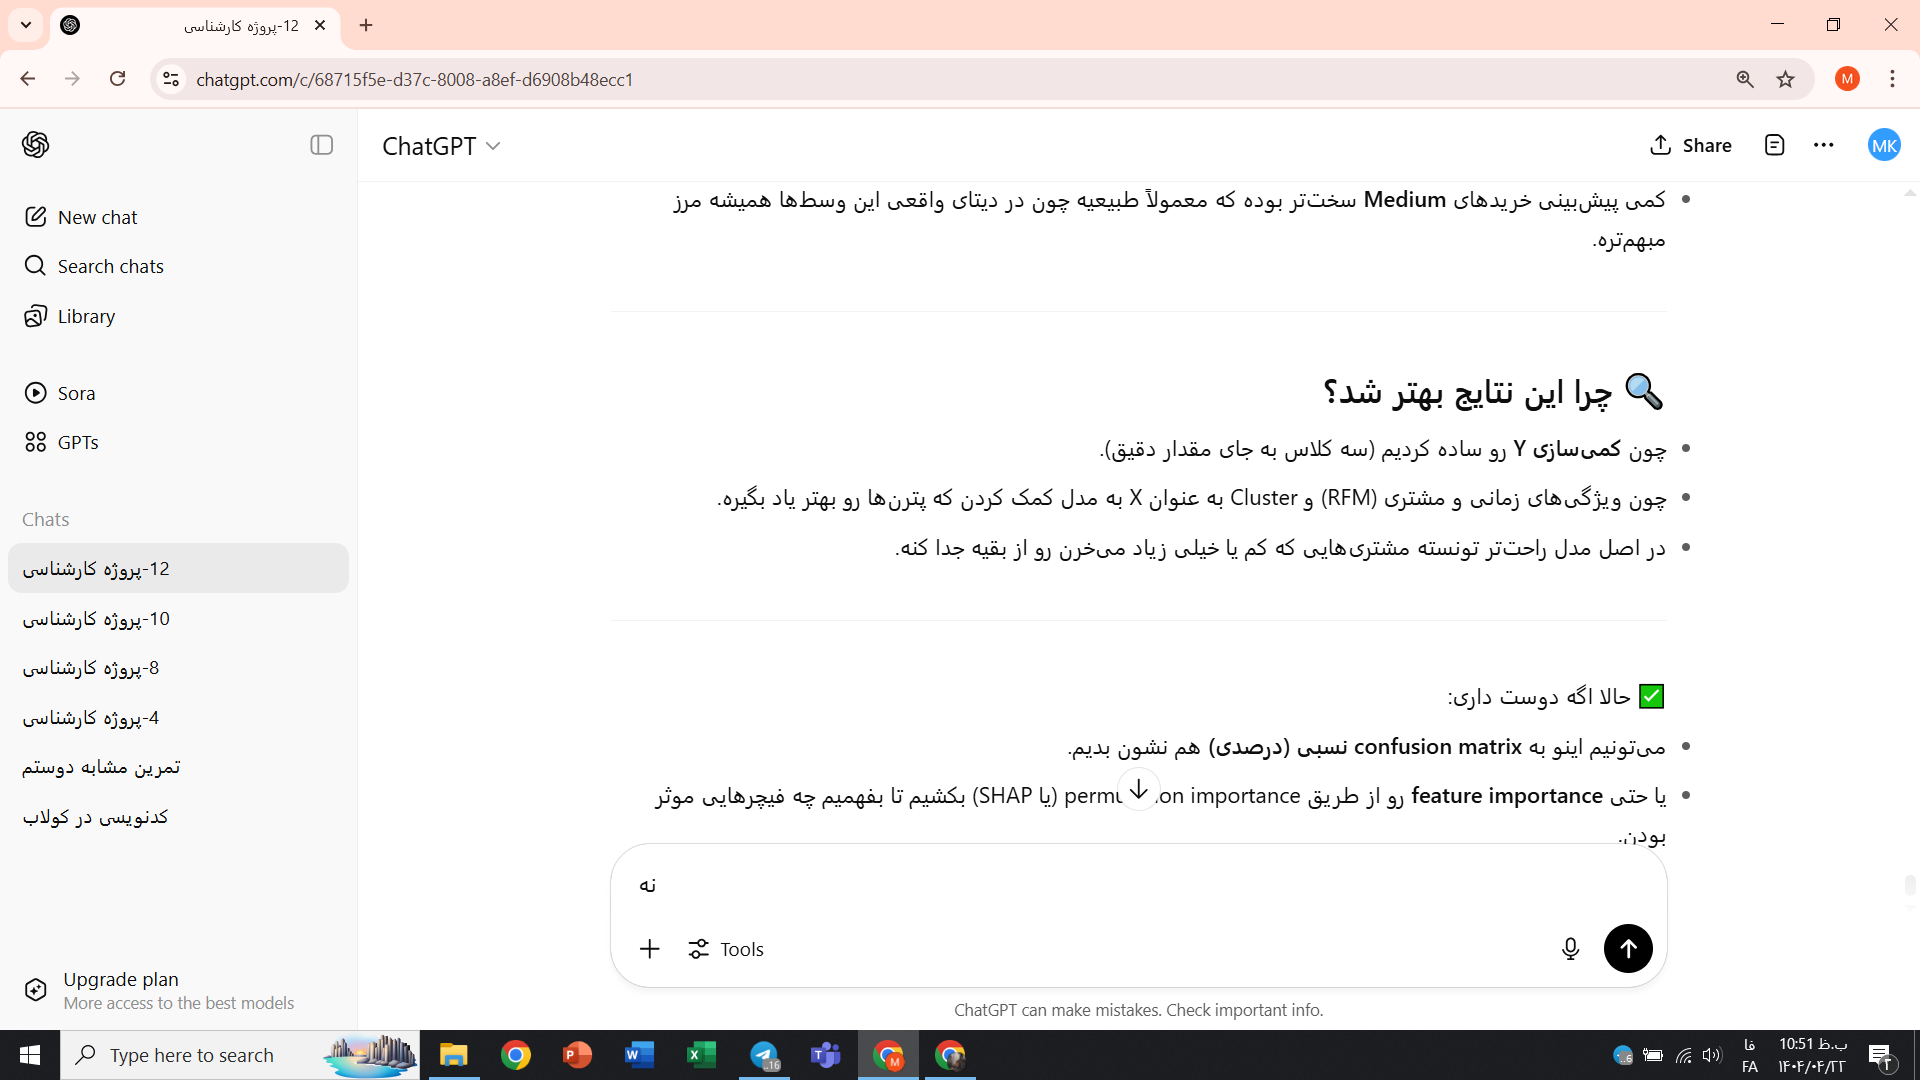